In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [2]:
# File to Load (Remember to change these)
city_url = "https://raw.githubusercontent.com/marazap90/Pyber_HW/master/data/city_data.txt"
ride_url = "https://raw.githubusercontent.com/marazap90/Pyber_HW/master/data/ride_data.txt"

# Read the City and Ride Data
city_data_to_load = pd.read_csv(city_url)
ride_data_to_load = pd.read_csv(ride_url)

In [3]:
# Read the City and Ride Data
# Combine the data into a single dataset
# Display the data table for preview
combined = pd.merge(ride_data_to_load, city_data_to_load)
combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# create and store color scheme per read.me
colors_dict = {"Rural":"gold","Suburban":"lightskyblue","Urban":"lightcoral"}

In [5]:
# group data by city
city_df = combined.groupby("city").agg({
    'type': 'first',
    'ride_id': 'count',
    'fare': 'mean',
    'driver_count': 'sum'}).reset_index()

city_df.columns = ['City', 'City Type', 'Volume of Rides', 'Average Fare', 'Volume of Drivers',]
city_df.head()

,City,City Type,Volume of Rides,Average Fare,Volume of Drivers
0,Amandaburgh,Urban,18,24.641667,216
1,Barajasview,Urban,22,25.332273,572
2,Barronchester,Suburban,16,36.422500,176
3,Bethanyland,Suburban,18,32.956111,396
4,Bradshawfurt,Rural,10,40.064000,70


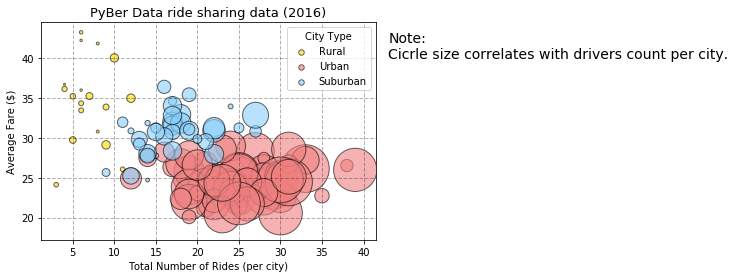

In [16]:
# Build the scatter plots for each city types
plt.scatter(
    city_df[city_df["City Type"] == "Rural"]["Volume of Rides"],
    city_df[city_df["City Type"] == "Rural"]["Average Fare"],
    s=city_df[city_df["City Type"] == "Rural"]["Volume of Drivers"],
    color= colors_dict["Rural"],
    label="Rural",
    alpha=0.6,
    edgecolors="black",
    linewidth=1
)

plt.scatter(
    city_df[city_df["City Type"] == "Urban"]["Volume of Rides"],
    city_df[city_df["City Type"] == "Urban"]["Average Fare"],
    s=city_df[city_df["City Type"] == "Urban"]["Volume of Drivers"],
    color= colors_dict["Urban"],
    label="Urban",
    alpha=0.6,
    edgecolors="black",
    linewidth=1
)

plt.scatter(
    city_df[city_df["City Type"] == "Suburban"]["Volume of Rides"],
    city_df[city_df["City Type"] == "Suburban"]["Average Fare"],
    s=city_df[city_df["City Type"] == "Suburban"]["Volume of Drivers"],
    color= colors_dict["Suburban"],
    label="Suburban",
    alpha=0.6,
    edgecolors="black",
    linewidth=1
)

plt.title("PyBer Data ride sharing data (2016)",fontsize=13)
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid(color='black', linestyle='--', linewidth=1,alpha=0.3)

# set legend handle & equal marker sizes
lgnd = plt.legend(fontsize=10, markerscale=.4, title = "City Type")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# adding note on the right
plt.text(43, 40, 'Note:' "\n" 
         'Cicrle size correlates with drivers count per city.', fontsize=14)

# save plot image
#plt.gcf()
plt.savefig("pyber_ride_sharing_data.png")

plt.show()

## Total Fares by City Type

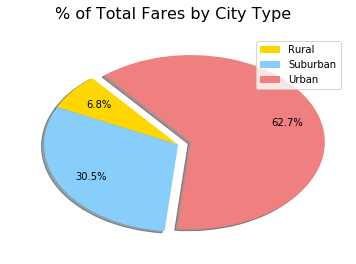

In [34]:
# create a groupby obj organized by type to get totals by type
by_type = combined.groupby("type")

total_fares = by_type.sum()["fare"]


# define arguments for all pie charts
labels = total_fares.index
colors = [colors_dict[color] for color in labels] #colors from dict defined above
explode = (0,0,0.1)

# create pie chart
plt.pie(total_fares,explode=explode,labels=None,colors=colors,autopct="%.1f%%",
        shadow=True,startangle=130,rotatelabels=False,pctdistance=.75)
plt.suptitle("% of Total Fares by City Type",fontsize=16)
plt.legend(labels,loc="upper right")


# save image
plt.savefig("total_fares_by_city_type.png")

plt.show()

## Total Rides by City Type

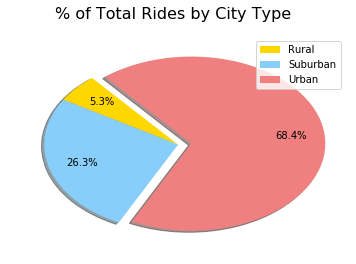

In [35]:
# get total rides per city type
total_rides = by_type.count()["ride_id"]

# create pie chart
plt.pie(total_rides,explode=explode,labels=None,colors=colors,autopct="%.1f%%",
        shadow=True,startangle=130,rotatelabels=False,pctdistance=.75)
plt.suptitle("% of Total Rides by City Type",fontsize=16)
plt.legend(labels,loc="upper right")

# save image
plt.savefig("total_rides_by_city_type.jpg")

plt.show()

## Total Drivers by City Type


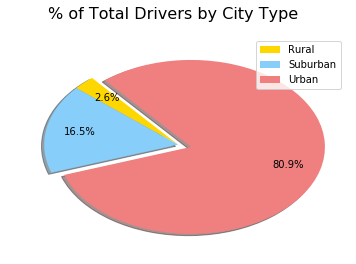

In [36]:
# get total drivers per city type
total_drivers = city_data_to_load.groupby("type")["driver_count"].sum()
total_drivers

# create pie chart
plt.pie(total_drivers,explode=explode,labels=None,colors=colors,autopct="%.1f%%",
        shadow=True,startangle=130,rotatelabels=False,pctdistance=.75)
plt.suptitle("% of Total Drivers by City Type",fontsize=16)
plt.legend(labels,loc="upper right")

# save image
plt.savefig("total_drivers_by_city_type.jpg")

plt.show()

 
## Trends based on the data:


#### Scatter plot:
* Not surprisingly, there is a positive correlation between the city size (categorized by type) and the volume of rides and drivers. On the other hand the average fare in these cities tends to be lower than in the rural areas.
* I would tend to believe that these outcomes are driven mostly by the market forces in these different cities. Relatively lower competition in the rural areas allows drivers to charge relatively higher prices. And while these prices aren't yet high enough to attract more competition from the urban areas drivers.
* If that is true, we should be able to observe higher prices in the most isolated rural areas, whereas rural areas closer to the urban centres should have lower fares. - the scatter seems to be suggesting this pattern

    * *It would be good to analyze more data, and try to control the analysis for other potential factors which could be explaining these outcomes (ex. if rural areas tend to have longer rides than the urban ones, it could be useful to normalize the prices in a '$/mile' fashion before making conclusions about the market competition
    
#### Pie charts:
* Pie charts are more transparently highlighting the fact that due to the higher average fares, rural drives are representing a bigger share of total Fares (6.8%) than they represent a share of total rides (5.3%). Moreover, this revenue is split only across the 2.6% of drivers.
    * *But again, before thinking that rural drivers are taking home on average double the income than their urban colleagues, we should make sure to normalize these incomes by total miles or working hours.